# Zomato Dataset Details
##### Dataset Collection -
Due to Zomato API Basic Plan restriction, we cannot collect enough data for analysis. To overcome this problem ‘Zomato.csv’ file is provided to analyse the data deeply and to get useful inference.  
Data has been collected from the Zomato API in the form of .json files(raw data) using the following url and stored in CSV file   - https://developers.zomato.com/api/v2.1/search?entity_id=1&entity_type=city&start=1&count=20   
zomato.csv - https://drive.google.com/file/d/1FSa_x3COvCoMODa44qXufO9CQb3ydqKw/view  

##### Details of zomato.csv -
1.Restaurant Id : Unique id of every restaurant across various cities of the world  
2.Restaurant Name : Name of the restaurant  
3.Country Code : Country in which restaurant is located  
4.City : City in which restaurant is located  
5.Address : Address of the restaurant  
6.Locality : Location in the city  
7.Locality Verbose : Detailed description of the locality  
8.Longitude : Longitude coordinate of the restaurant's location  
9.Latitude : Latitude coordinate of the restaurant's location  
10.Cuisines : Cuisines offered by the restaurant  
11.Average Cost for two : Cost for two people in different currencies  
12.Currency : Currency of the country  
13.Has Table booking : yes/no  
14.Has Online delivery : yes/ no  
15.Is delivering : yes/ no  
16.Switch to order menu : yes/no  
17.Price range : range of price of food  
18.Aggregate Rating : Average rating out of 5  
19.Rating color : depending upon the average rating color  
20.Rating text : text on the basis of rating of rating  
21.Votes : Number of ratings casted by people  

## Part 1
The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

### Problem 1.1 :
Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df =df .dropna(subset = ['City'])
df = df[df['Country Code']==1]

In [27]:
Cities = ['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad']

df_NCR = df[(df['City'].isin(Cities))]
df_ROI = df[~(df['City'].isin(Cities))]

In [28]:
NCR_count = df_NCR.City.count()
ROI_count = df_ROI.City.count()

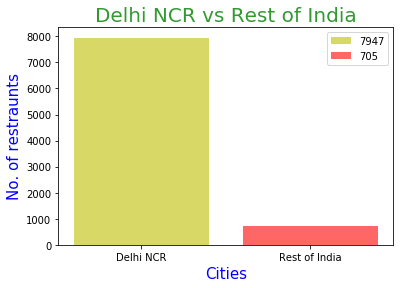

In [29]:
x = ['Delhi NCR', 'Rest of India']
y = [NCR_count,ROI_count]
plt.bar(x[0],y[0],color='y',alpha=0.6)
plt.bar(x[1],y[1],color='r',alpha=0.6)
plt.ylabel("No. of restraunts",size=15,color='b')
plt.xlabel("Cities",size=15,color='b')
plt.title('Delhi NCR vs Rest of India',fontsize=20, color='g',alpha=0.8)
plt.legend(y)
plt.show()

### Problem 1.2 :
Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')

df = df[df['Country Code']==1]

df =df.dropna(subset = ['City'])

Cities = ['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad']

df_ROI = df[~(df['City'].isin(Cities))]
df_NCR = df[(df['City'].isin(Cities))]

In [31]:
set_roi=set()

cuisines_ROI = df_ROI['Cuisines'].str.split(', ')

for ele in cuisines_ROI:
    for j in ele:
        set_roi.add(j)

set_ncr=set()

cuisines_NCR = df_NCR['Cuisines'].str.split(', ')

for ele in cuisines_NCR:
    for j in ele:
        set_ncr.add(j)
        
print(set_roi-set_ncr)

{'BBQ', 'Malwani', 'German', 'Cajun'}


In [32]:
import requests

df_ROI =df_ROI.dropna(subset = ['Cuisines'])

header = {'user-key': '6eacc55f385ade30c93e9d0259691e14'}
data = {'city_id':'1'}
response = requests.get('https://developers.zomato.com/api/v2.1/cuisines',headers=header,params=data)
data = response.json()
set_z_api=set()
for ele in data['cuisines']:
    set_z_api.add(ele['cuisine']['cuisine_name'])

In [33]:
for i in set_roi-set_ncr :
    if i in set_z_api:
        print(i)

BBQ


#### Conclusion : Dataset is incomplete because 'BBQ' Cuisine is served in Delhi-NCR .


### Problem 1.3 :
Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')

df = df[df['Country Code']==1]

Cities = ['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad']

df_ROI = df[~(df['City'].isin(Cities))]
df_NCR = df[(df['City'].isin(Cities))]

In [35]:
cuisines_NCR = df_NCR['Cuisines'].str.split(', ')

In [36]:
cuisines_ROI = df_ROI['Cuisines'].str.split(', ')

In [37]:
freq_NCR={}
for ele in cuisines_NCR:
    for j in ele:
        freq_NCR[j] = freq_NCR.get(j,0) + 1

In [38]:
freq_ROI={}
for ele in cuisines_ROI:
    for j in ele:
        freq_ROI[j] = freq_ROI.get(j,0) + 1

In [39]:
cuisine_NCR_list =[]
cuisine_NCR_count =[]
counter_NCR=0
print("Top 10 Cuisines in Delhi NCR")
print('-----------------------------')
for w in sorted(freq_NCR, key=freq_NCR.get, reverse=True):
    if counter_NCR>=10:
        break
    print(w, freq_NCR[w])
    cuisine_NCR_list.append(w)
    cuisine_NCR_count.append(freq_NCR[w])
    counter_NCR=counter_NCR+1

Top 10 Cuisines in Delhi NCR
-----------------------------
North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535


In [40]:
cuisine_ROI_list =[]
cuisine_ROI_count =[]
counter_ROI=0
print("Top 10 Cuisines in Rest of India")
print('-----------------------------')
for w in sorted(freq_ROI, key=freq_ROI.get, reverse=True):
    if counter_ROI>=10:
        break
    print(w, freq_ROI[w])
    cuisine_ROI_list.append(w)
    cuisine_ROI_count.append(freq_ROI[w])
    counter_ROI=counter_ROI+1

Top 10 Cuisines in Rest of India
-----------------------------
North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


### Problem 1.4 :
Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

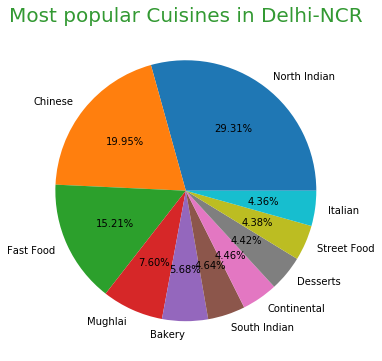

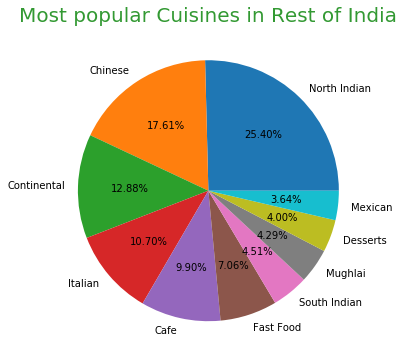

In [41]:
plt.figure(figsize=(12,6))
plt.pie(cuisine_NCR_count,labels= cuisine_NCR_list,autopct='%0.2f%%',radius=1)
plt.title('Most popular Cuisines in Delhi-NCR',fontsize=20, color='green',alpha=0.8)
plt.show()

plt.figure(figsize=(12,6))
plt.pie(cuisine_ROI_count,labels= cuisine_ROI_list,autopct='%0.2f%%',radius=1)
plt.title('Most popular Cuisines in Rest of India',fontsize=20, color='green',alpha=0.8)
plt.show()

####  Inference : 
i). North Indian and Chinese are the most popular Cuisines in Delhi-NCR Regions and Rest of India.

ii). Fast food and Mughlai are more popular in Delhi-NCR Regions whereas Continental and Italian are more served in rest ofthe  India.

iii). Overall number of restaurants registered with Zomato is much more in Delhi-NCR than Rest of India.

# Part 2
User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

Problem 2.1 :
Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

Problem 2.1.1 :
Number of Votes given Restaurant

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df = df[df['Country Code']==1]
df = df.dropna(subset=['Aggregate rating','Votes'])

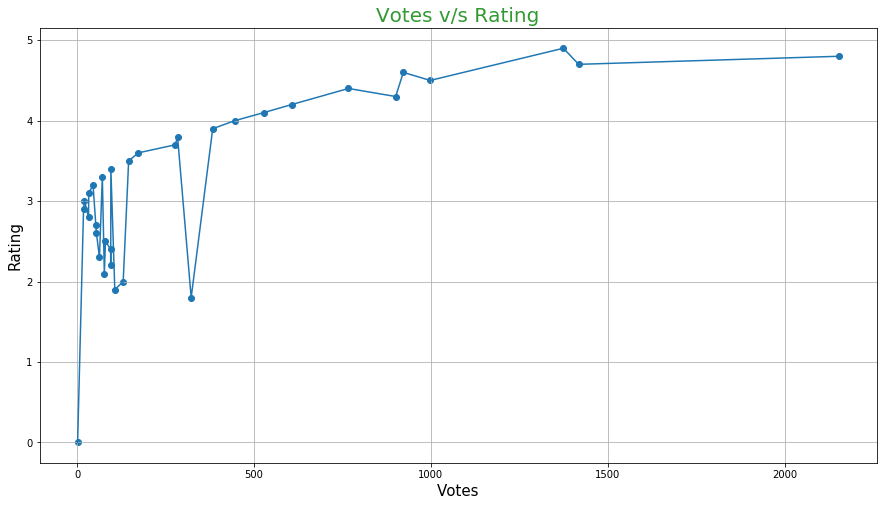

In [37]:
data = df["Votes"].groupby(df['Aggregate rating']).mean()
c = data.sort_values(ascending=True)
rating = c.index
votes = c.values
plt.figure(figsize=(15,8))
plt.scatter(votes,rating)
plt.plot(votes,rating)
plt.title('Votes v/s Rating',fontsize=20, color='green',alpha=0.8)
plt.xlabel('Votes',size=15)
plt.ylabel('Rating',size=15)
plt.grid()
plt.show()

####  Inference : 
i) The Restaurants rated between or below 3.5 and 4.5 have votes are below or equal to 1000.

ii) We can say the he rating increases with increase in number of votes

iii) The highest rated Restaurant has 1400 Votes.

### Problem 2.1.2 :
Restaurant serving more number of cuisines.

In [42]:
df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df = df[df['Country Code']==1]
df = df.dropna(subset=['Aggregate rating','Cuisines'])

In [43]:
cuisines = df['Cuisines'].str.split(', ')
Agg_rating = df["Aggregate rating"]
count=[]
for ele in cuisines:
    count.append(len(ele))
df['Cuisine_serve_Count'] = count
cuisine_serve_count = df['Cuisine_serve_Count']

In [44]:
data = df.groupby(['Cuisine_serve_Count'])['Aggregate rating'].mean()

Average User Rating of Restuarants serving 1 Cuisines is 2.0551
Average User Rating of Restuarants serving 2 Cuisines is 2.5634
Average User Rating of Restuarants serving 3 Cuisines is 2.8905
Average User Rating of Restuarants serving 4 Cuisines is 3.3792
Average User Rating of Restuarants serving 5 Cuisines is 3.4813
Average User Rating of Restuarants serving 6 Cuisines is 3.6514
Average User Rating of Restuarants serving 7 Cuisines is 3.6462
Average User Rating of Restuarants serving 8 Cuisines is 3.2667


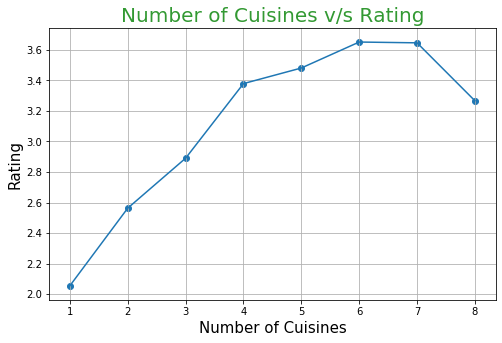

In [45]:
number_of_cuisines= data.index
rating = np.round(data.values,4)
        
for i in range(len(rating)):
    print('Average User Rating of Restuarants serving',number_of_cuisines[i],'Cuisines is',rating[i])
    
plt.figure(figsize=(8,5))
plt.scatter(number_of_cuisines,rating)
plt.plot(number_of_cuisines,rating)
plt.title('Number of Cuisines v/s Rating',fontsize=20, color='green',alpha=0.8)
plt.xlabel('Number of Cuisines',size=15)
plt.ylabel('Rating',size=15)
plt.grid()
plt.show()

####  Inference : 
From the graph we see that as the number of cuisines increases fro 1 to 4 the rating increases steeply in a linear fashion.

From 4 to 6 as number of cuisines increase the ratings increase less steeply.

From 6 to 7 as number of cuisines increase the rating remain almost constant.

From 7 to 8 as number of cuisine decrease the rating decreases.

### Problem 2.1.3 :
Average Cost of Restaurant

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df = df[df['Country Code']==1]
df.dropna(subset=['Aggregate rating','Average Cost for two'],inplace=True)
df = df[df['Average Cost for two']!=0]

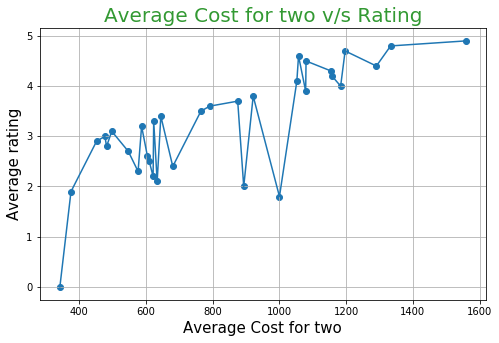

In [4]:
data = df["Average Cost for two"].groupby(df['Aggregate rating']).mean()
c = data.sort_values(ascending=True)
rating = c.index
avg_cost = c.values

plt.figure(figsize=(8,5))
plt.scatter(avg_cost,rating)
plt.plot(avg_cost,rating)
plt.title('Average Cost for two v/s Rating',fontsize=20, color='green',alpha=0.8)
plt.ylabel("Average rating",size=15)
plt.xlabel("Average Cost for two",size=15)
plt.grid()
plt.show()

####  Inference : 
The rating is increasing very rapidly when cost increases from 0 to 500(approx).

From 500-1000(approx) there are increase and decrease but overall increase with a dip at 1000 and mostly increase after that (1000 to 1600)

This shows that there is an overall increase in the rating if the average cost increases.

### Problem 2.1.4 :
Restaurant serving some specific cuisines.

In [50]:
df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df = df[df['Country Code']==1]
df = df.dropna(subset=['Aggregate rating','Cuisines'])

In [51]:
cuisines = df['Cuisines'].str.split(', ')

Top 10 Rated Cuisines are:
Cajun 3.8
Healthy Food 3.8
Armenian 3.8
Salad 3.8
Bakery 3.8
Mithai 3.8
Biryani 3.8
Juices 3.8
Maharashtrian 3.8
Hyderabadi 3.8


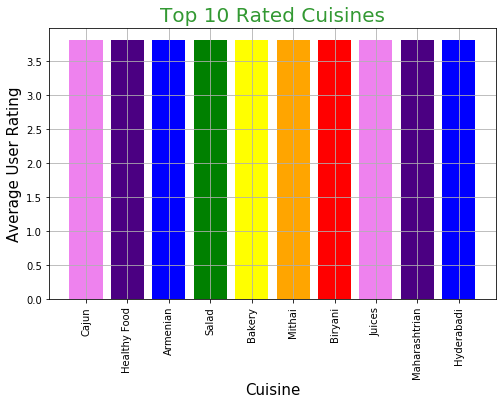

Lowest 10 Rated Cuisines are :
North Indian 3.8
Vietnamese 3.8
Iranian 3.8
African 3.8
Portuguese 3.8
Bengali 3.8
Persian 3.8
South American 3.8
Sushi 3.8
Lucknowi 3.8


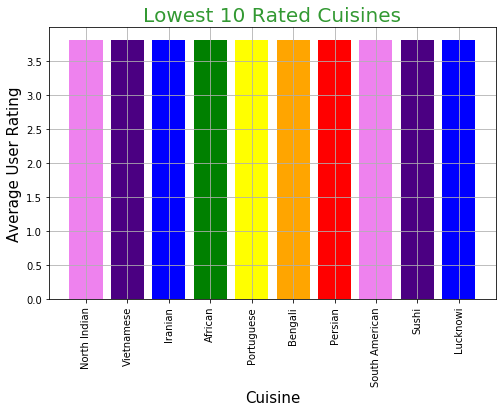

In [52]:
dct = {}
cuisines = np.array(df['Cuisines'].str.split(', '))
rating = np.array(df["Aggregate rating"])
for ele in cuisines:
    for c in ele:
        if c in dct:
            l = dct[c]
            l.append(rating[i])
            dct[c] = l
        else:
            dct[c] = [rating[i]]
for k, v in dct.items():
    dct[k] = sum(v)/len(v)
        
cuisine = np.array(list(dct.keys()))
rating = np.array(list(dct.values()))
rating = np.round(rating, decimals=2)

ind = rating.argsort()[::-1]
ind = ind[:10]

cuisine_t10 = cuisine[ind]
rate_t10 = rating[ind]

print('Top 10 Rated Cuisines are:')
for i in range(10):
    print(cuisine_t10[i],rate_t10[i])

color = ['violet','indigo','blue','green','yellow','orange','red']    
plt.figure(figsize=(8,5))    
plt.bar(cuisine_t10, rate_t10, color=color)
plt.ylabel('Average User Rating',size=15)
plt.xlabel('Cuisine',size=15)
plt.title('Top 10 Rated Cuisines',fontsize=20, color='green',alpha=0.8)
plt.xticks(rotation=90)
plt.grid()
plt.show()

ind = rating.argsort()
ind = ind[:10]

cuisine_l10 = cuisine[ind]
rate_l10 = rating[ind]

print('Lowest 10 Rated Cuisines are :')
for i in range(10):
    print(cuisine_l10[i],rate_l10[i])
    
plt.figure(figsize=(8,5))    
plt.bar(cuisine_l10, rate_l10, color=color)
plt.ylabel('Average User Rating',size=15)
plt.xlabel('Cuisine',size=15)
plt.title('Lowest 10 Rated Cuisines',fontsize=20, color='green',alpha=0.8)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

### Problem 2.2 :
Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?  
Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

In [48]:
df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df = df[df['Country Code']==1]
df.dropna(subset=['Aggregate rating','Votes','Locality'],inplace=True)

*****Top 10 localities with top weighted restaurant rating**
Aminabad 4.9
Hotel Clarks Amer, Malviya Nagar 4.9
Friends Colony 4.89
Powai 4.84
Kirlampudi Layout 4.82
Express Avenue Mall,  Royapettah 4.8
Deccan Gymkhana 4.8
Banjara Hills 4.72
Sector 5, Salt Lake 4.71
Riverside Mall, Gomti Nagar 4.7


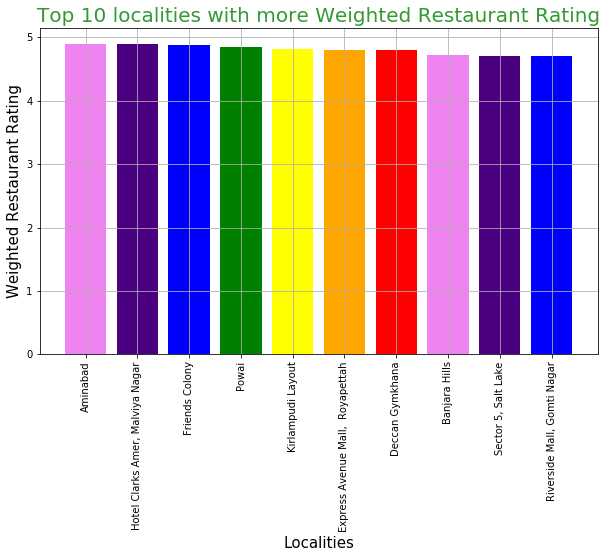

In [49]:
x = df.groupby(by = 'Locality').apply(lambda x: ((x['Votes'] * x['Aggregate rating']).sum()))
y = df.groupby(by = 'Locality').apply(lambda x: (x['Votes'].sum()))
weighted_rating = x/y
c=weighted_rating.sort_values(ascending=False)
locality = np.array(c.index[:10])
wt_rating = np.array(c.values[:10])
print('*****Top 10 localities with top weighted restaurant rating**')
for i in range(10):
    print(locality[i],round(wt_rating[i],2))
    
color = ['violet','indigo','blue','green','yellow','orange','red']
    
plt.figure(figsize=(10,6))    
plt.bar(locality, wt_rating, color=color)
plt.ylabel('Weighted Restaurant Rating',size=15)
plt.xlabel('Localities',size=15)
plt.title('Top 10 localities with more Weighted Restaurant Rating',fontsize=20, color='green',alpha=0.8)
plt.xticks(rotation=90)
plt.grid()
plt.show()

####  Inference : 
The weighted restaurant rating of top ten localities is approximately almost the same for varying localities. 

Although to be precise the height of the bars are gradually decreasing with varying localities from left to right.

## Part 3 : Visualization

### Problem 3.1 :
Plot the bar graph top 15 restaurants have a maximum number of outlets.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df = df[df['Country Code']==1]

restaurant = df['Restaurant Name'].value_counts().head(15)

In [18]:
restaurant_names = list(restaurant.index)
restaurant_count = list(restaurant.values)

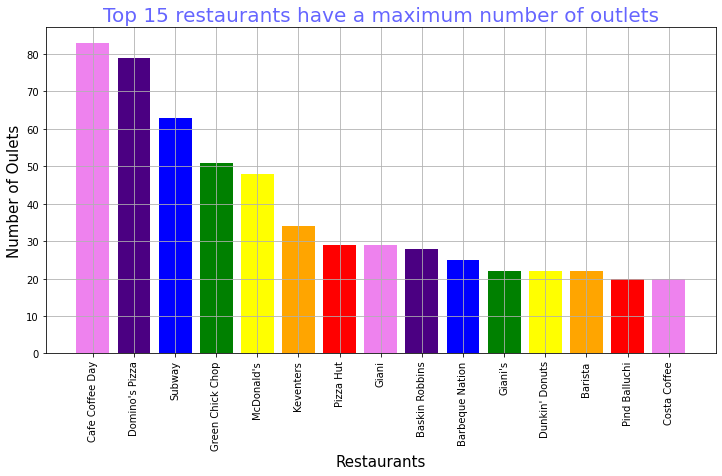

In [21]:
color = ['violet','indigo','blue','green','yellow','orange','red']
plt.figure(figsize=(12,6))
plt.bar(restaurant_names,restaurant_count,color=color)
plt.xlabel('Restaurants',size=15)
plt.ylabel('Number of Oulets',size=15)
plt.xticks(rotation=90)
plt.title("Top 15 restaurants have a maximum number of outlets", fontsize=20, color='blue',alpha=0.6)
plt.grid()
plt.show()

####  Inference :
Among the top 15 restaurants,

Cafe Coffee Day has the maximum number of outlets & Costa Coffee has the lowest number of outlets

### Problem 3.2 :
Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant)

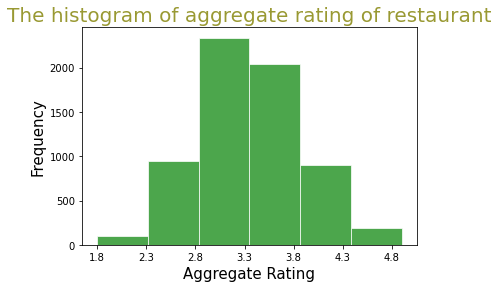

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df = df[df['Country Code']==1]
df.dropna(subset=['Aggregate rating'],inplace=True)
df = df[df['Aggregate rating']!=0]

rating = df['Aggregate rating']
rating = list(rating)
xt = np.arange(1.8, 5, 0.5)
plt.hist(rating,bins=6,edgecolor='white',color='green',alpha=0.7)
plt.title('The histogram of aggregate rating of restaurant',fontsize=20, color='olive',alpha=0.8)
plt.ylabel('Frequency',size=15)
plt.xlabel('Aggregate Rating',size=15)
plt.xticks(xt)
plt.show()

####  Inference :
From the graph we infer that most of the restaurants are rated between 2.8 to 3.8(approx).. 

There are less very less number of restaurants in the low rating 1.8 to 2.3(approx) as well as less restaraunts rated higher than 4.3 to 5(approx).

### Problem 3.3 :
Plot the bar graph top 10 restaurants in the data with the highest number of votes.

Top 10 restaurants in the data with the highest number of votes
1 Toit 10934
2 Truffles 9667
3 Hauz Khas Social 7931
4 Peter Cat 7574
5 AB's - Absolute Barbecues 6907
6 Barbeque Nation 5966
7 Big Brewsky 5705
8 AB's - Absolute Barbecues 5434
9 The Black Pearl 5385
10 BarBQ 5288


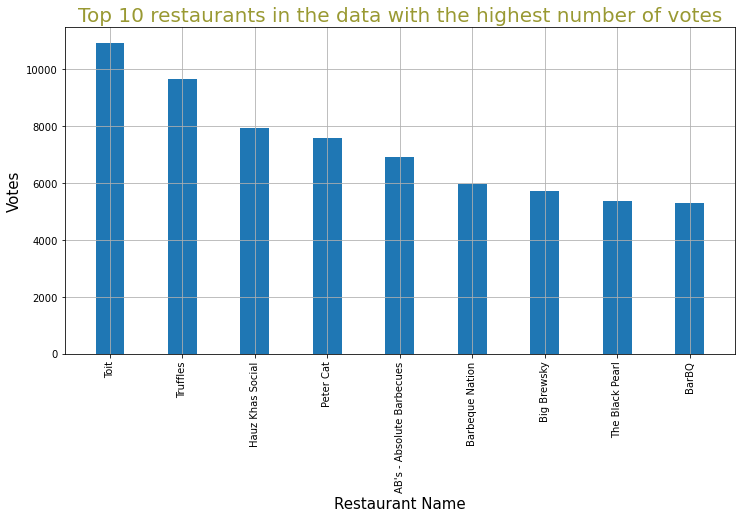

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df = df.sort_values(by ='Votes', ascending=False).head(10)
res_name = list(df['Restaurant Name'])
votes = list(df['Votes'])
print('Top 10 restaurants in the data with the highest number of votes')
for i in range(10):
    print(i+1,res_name[i],votes[i])

plt.figure(figsize=(12,6))
plt.bar(res_name,votes,width=0.4)
plt.ylabel("Votes",size=15)
plt.xlabel("Restaurant Name",size=15)
plt.title('Top 10 restaurants in the data with the highest number of votes',fontsize=20, color='olive',alpha=0.8)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

####  Inference :
From the graph we can say that Toit is the most voted restaurant in India with 10934 votes.

### Problem 3.4 :
Plot the pie graph of top 10 cuisines present in restaurants in the USA.

Top 10 Cuisines in USA
American 112
Seafood 59
Burger 49
Sandwich 49
Pizza 49
Steak 42
Italian 38
Breakfast 37
Mexican 36
Sushi 34


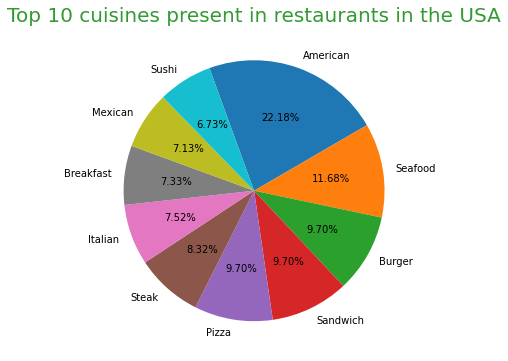

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')

df_USA = df[df['Country Code']==216]

df_USA =df_USA.dropna(subset = ['Cuisines'])

cuisines_USA = df_USA['Cuisines'].str.split(', ')

freq_USA={}
for ele in cuisines_USA:    
    for j in ele:
        freq_USA[j] = freq_USA.get(j,0) + 1
        
        
cuisine_USA_list =[]
cuisine_USA_count =[]
counter_USA=0
print("Top 10 Cuisines in USA")
for w in sorted(freq_USA, key=freq_USA.get, reverse=True):
    if counter_USA>=10:
        break
    print(w, freq_USA[w])
    cuisine_USA_list.append(w)
    cuisine_USA_count.append(freq_USA[w])
    counter_USA=counter_USA+1
    
plt.figure(figsize=(12,6))
plt.pie(cuisine_USA_count,labels=cuisine_USA_list,autopct='%0.2f%%',counterclock=False,startangle=110)
plt.title('Top 10 cuisines present in restaurants in the USA',fontsize=20, color='green',alpha=0.8)
plt.show()

####  Inference :
From the graph we can say,

American is the most popular cuisine in USA. 

Seafood, Burger,sandwich are also popular cuisines in USA.

### Problem 3.5 :
Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

In [46]:
df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df = df[df['Country Code']==1]
df = df.dropna(subset=['Aggregate rating','Votes','City'])

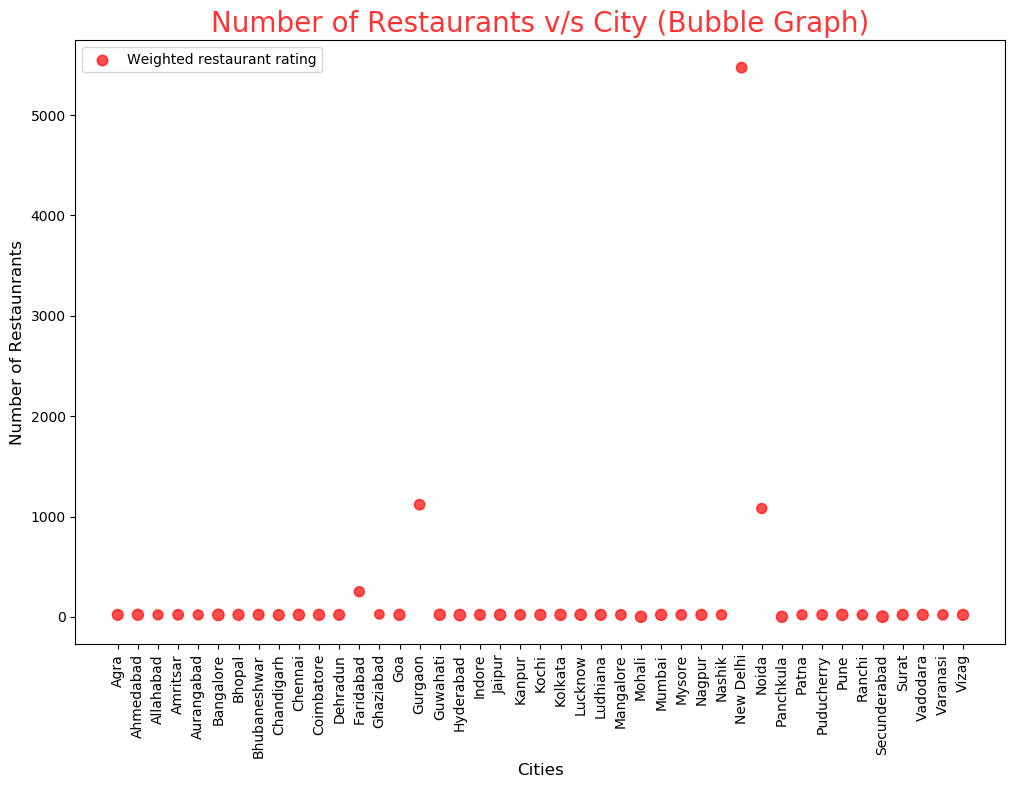

In [47]:
x = df.groupby(by = 'City').apply(lambda x: ((x['Votes'] * x['Aggregate rating']).sum()))
y = df.groupby(by = 'City').apply(lambda x: (x['Votes'].sum()))

restaurant_count = df.groupby(by = 'City').count()['Restaurant Name']
weighted_rating = x/y

plt.figure(num=None, figsize=(12, 8), dpi=100, facecolor='white', edgecolor='red')
plt.scatter( restaurant_count.index,restaurant_count.values,s = weighted_rating*15, alpha = 0.7, c = 'red')
plt.title('Number of Restaurants v/s City (Bubble Graph)',fontsize=20, color='red',alpha=0.8)
plt.xlabel('Cities', size = 12)
plt.ylabel('Number of Restaunrants', size = 12)
plt.legend(['Weighted restaurant rating'],loc ='upper left')
plt.xticks(rotation = 90)
plt.show()